In [95]:
#importing libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [96]:
#making connectioin to database
db_path = "C:/Users/ASUS 1/project/inventory.db"
con = sqlite3.connect(db_path)

In [97]:
df = pd.read_sql_query("select * from vendor_sales_summary",con)
df.head()

,vendornumber,vendorname,brand,description,purchaseprice,actualprice,volume,totalpurchasequantity,totalpurchasedollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,gross_profit,profit_margin,stock_turnover,sales_to_purchase_ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


# 🧪 Exploratory Data Analysis 
- In the earlier phase, we explored all raw tables within the database to understand the structure of each dataset, identify important variables, and define how they should be merged for meaningful analysis.

- In this stage, we focus on the final aggregated table (vendor_sales_summary) created during the data preparation phase. Our goal is to analyze the distribution of its columns, uncover patterns, spot potential anomalies, and validate overall data quality — ensuring the dataset is ready for business insights and decision-making.

In [99]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendornumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
purchaseprice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
actualprice,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
volume,10692.0,847.360550,664.309212,50.000000,750.000000,750.000000,750.000000,2.000000e+04
totalpurchasequantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
totalpurchasedollars,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
totalsalesquantity,10692.0,3077.482136,10952.851391,0.000000,33.000000,261.000000,1929.250000,3.349390e+05
totalsalesdollars,10692.0,42239.074419,167655.265984,0.000000,729.220000,5298.045000,28396.915000,5.101920e+06
totalsalesprice,10692.0,18793.783627,44952.773386,0.000000,289.710000,2857.800000,16059.562500,6.728193e+05


In [100]:
# Getting the most frequently occurring value (mode) for each column.
# Useful for identifying common patterns or default values (e.g., common freight cost, common vendor).
df.mode().iloc[0]


vendornumber                              4425.0
vendorname                 MARTIGNETTI COMPANIES
brand                                        809
description                     Southern Comfort
purchaseprice                               6.53
actualprice                                 9.99
volume                                     750.0
totalpurchasequantity                       12.0
totalpurchasedollars                       95.28
totalsalesquantity                          12.0
totalsalesdollars                            0.0
totalsalesprice                              0.0
totalexcisetax                               0.0
freightcost                            144929.24
gross_profit                              -106.8
profit_margin                                0.0
stock_turnover                               1.0
sales_to_purchase_ratio                      0.0
Name: 0, dtype: object

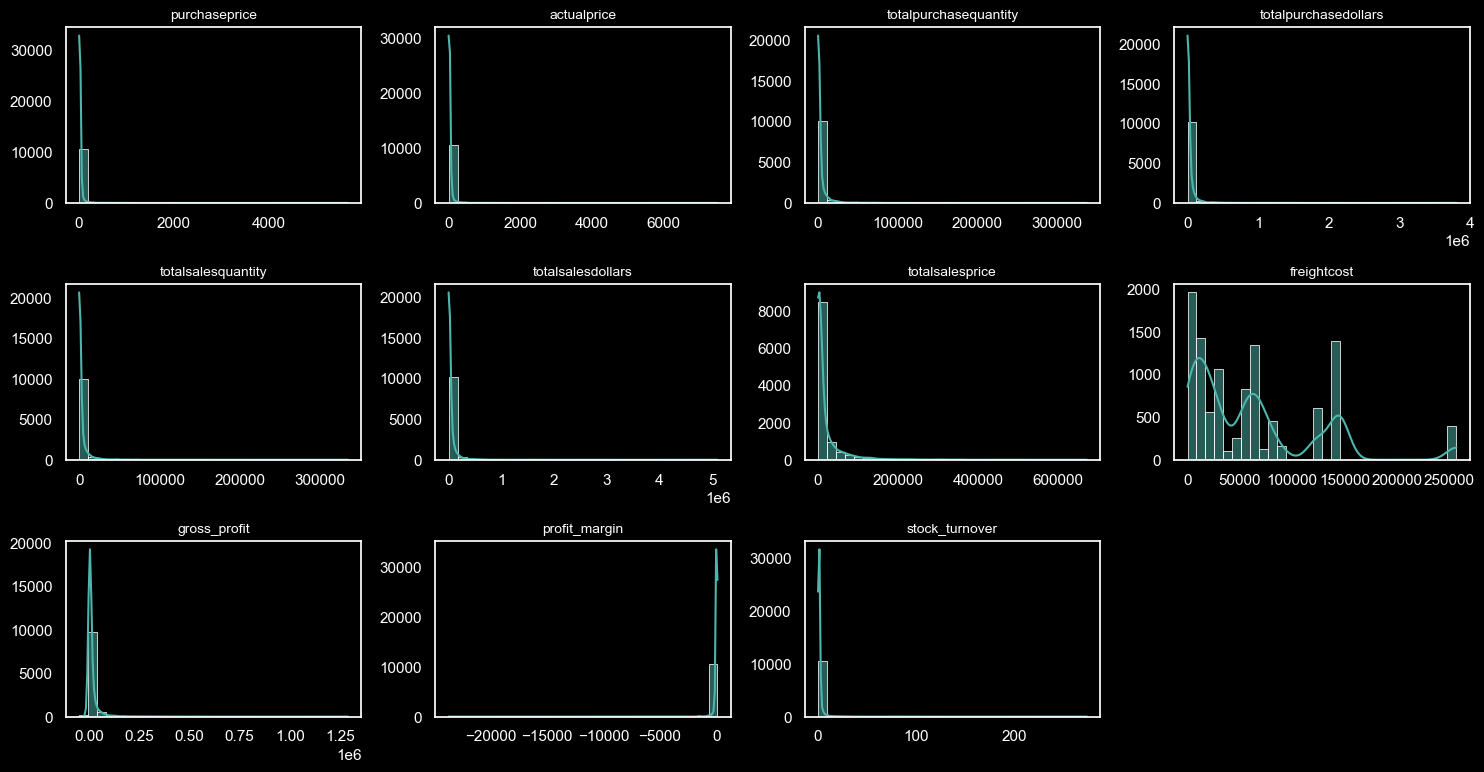

In [101]:
# Helps identify skewness, concentration of values, and potential outliers.
eda_cols = [
    'purchaseprice', 'actualprice', 'totalpurchasequantity', 'totalpurchasedollars',
    'totalsalesquantity', 'totalsalesdollars', 'totalsalesprice',
    'freightcost', 'gross_profit', 'profit_margin', 'stock_turnover'
]
# Apply black theme
plt.style.use('dark_background')
sns.set_palette('Set2') 

# Custom color for histogram 
hist_color = '#4DB6AC'  

plt.figure(figsize=(15, 10))
for i, col in enumerate(eda_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30, color=hist_color)
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()
plt.show()


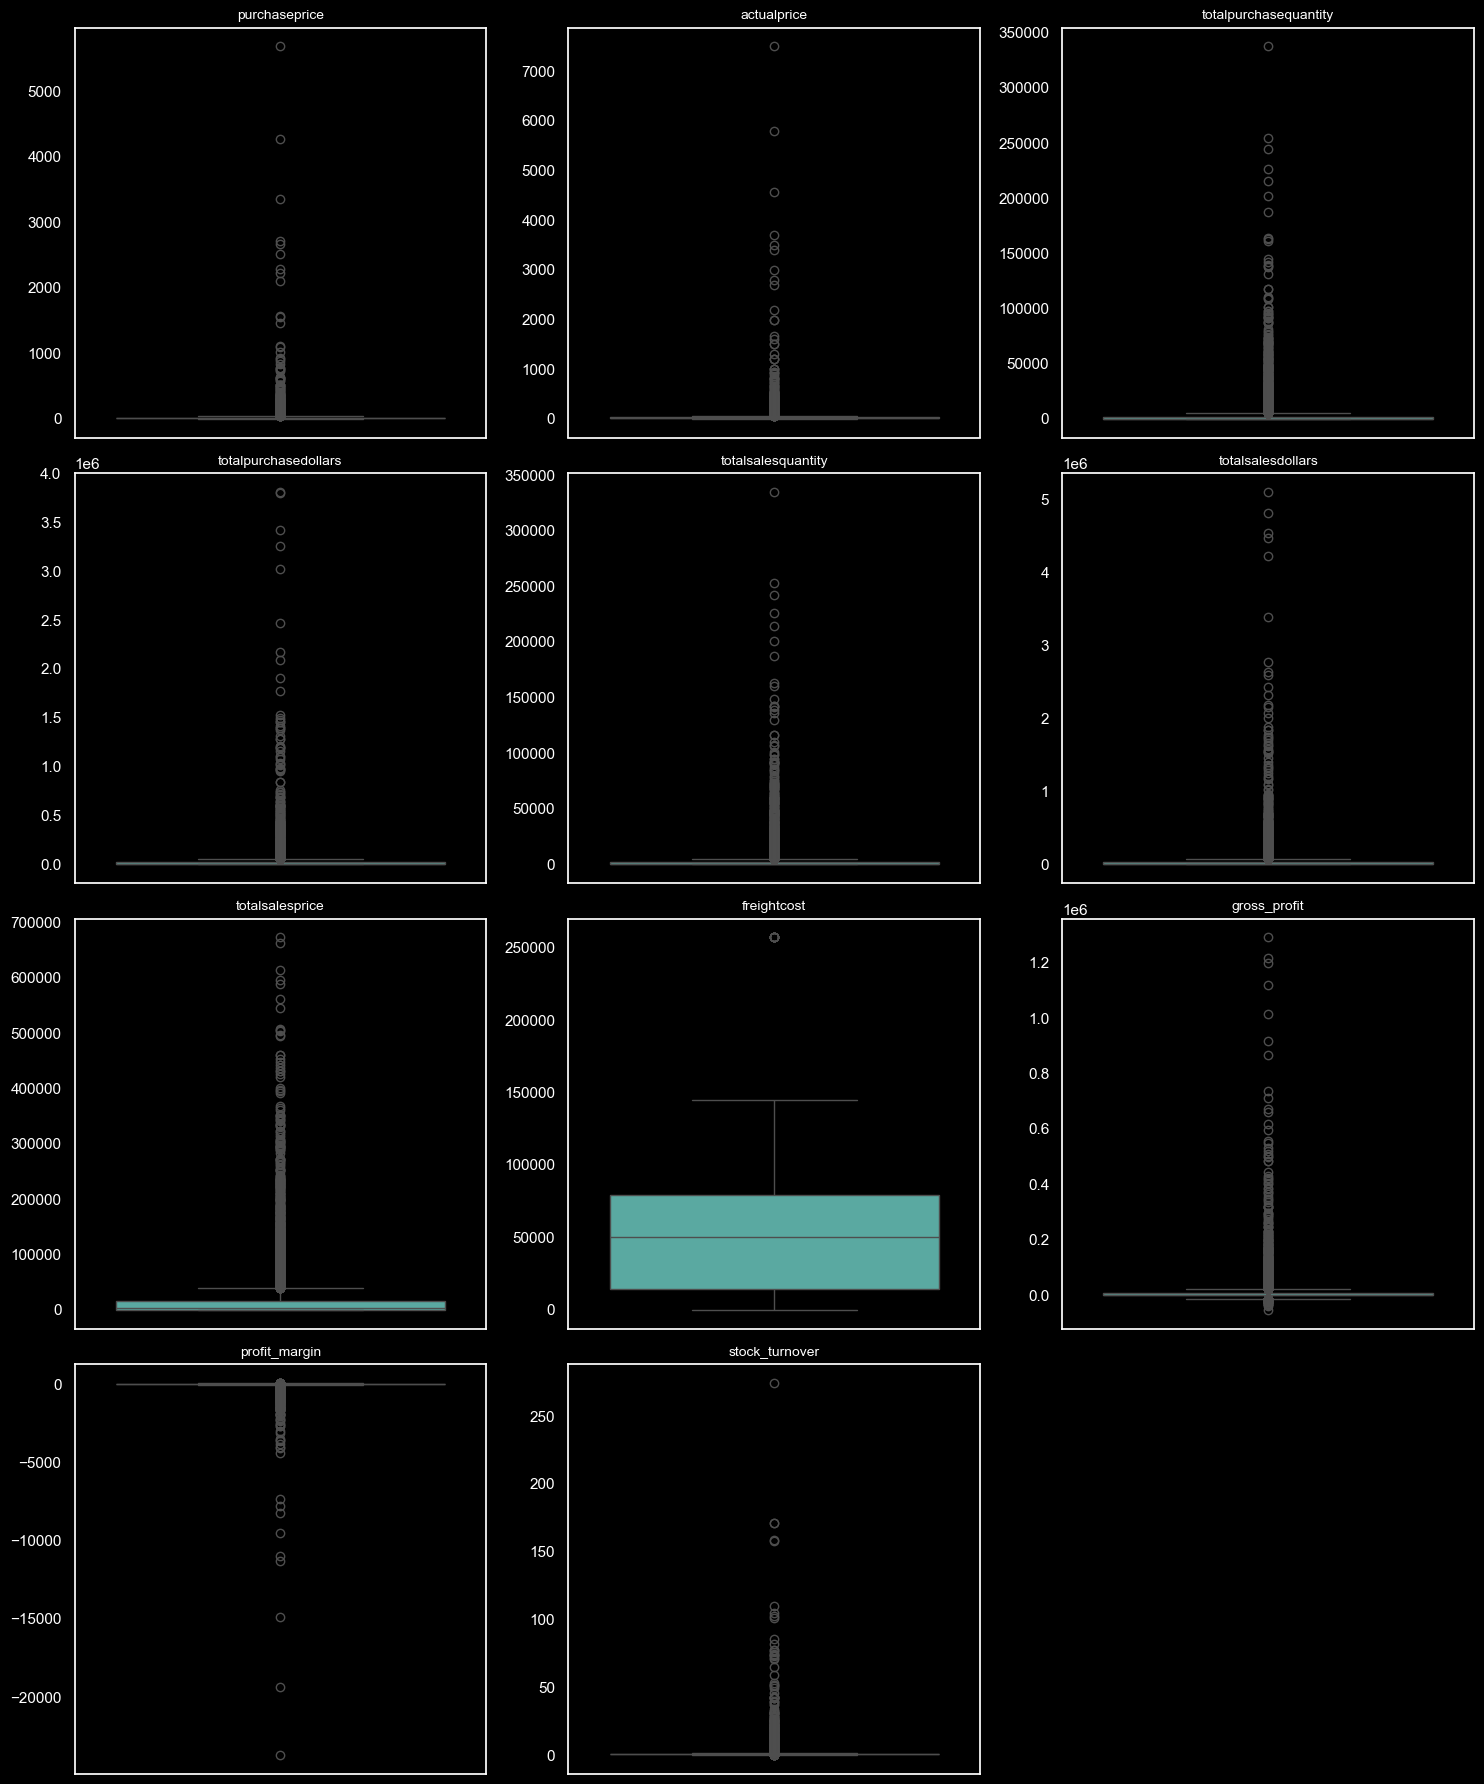

In [102]:
# Boxplots help visualize data spread and outliers.
# Especially useful for identifying vendors or records with extremely high costs, losses, or volumes.

plt.figure(figsize=(15, 18))
for i, col in enumerate(eda_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=df, y=col, color=hist_color)
    plt.title(col, fontsize=10)
    plt.ylabel("")
plt.tight_layout()
plt.show()



## Summary Statistics Insights:

### 📉 Value Distribution & Outliers
- Most numeric features (sales, purchase, profit) are **right-skewed**, with a high concentration of values near the lower end.
- **Boxplots revealed extreme outliers** in almost all key columns except `freightcost`, which appears tightly distributed.
- `profit_margin` includes **real and deep losses**, likely caused by heavy discounts or unsold inventory.

### ⚠️ Negative or Zero Values
- `gross_profit` has values as low as **-52002.78**, indicating **loss-making transactions** — possibly due to high costs or clearance sales.
- `profit_margin` has extreme negatives, even approaching **-infinity** in some rows, suggesting sales below cost or zero revenue.
- `totalsalesquantity` and `totalsalesdollars` have **0 as minimum**, meaning certain vendors made no sales — could be inactive, new, or seasonal vendors.

### 📦 Freight Cost Behavior
- `freightcost` stands out for **its stable distribution**.
- Histogram shows **distinct spikes**, likely due to system-defined slabs (e.g. ₹25K, ₹50K).
- This should be considered while analyzing vendor profitability — high freight can reduce margin.

### 🧮 Pricing Observations
- `purchaseprice` and `actualprice` show a large difference between **max and mean**, indicating some **premium or irregularly priced items**.
- Most prices are low, but a few extremely high-priced items pull the mean up.

### 📊 Stock Turnover
- Very wide range: from **0 to 274.5**
- High turnover means the item sells faster than it’s purchased — possible stock depletion or fulfillment from older stock.






In [104]:
# Option 1: SQL Filtering (faster if data is large and stored in DB)

df = pd.read_sql_query("""
    SELECT * FROM vendor_sales_summary
    WHERE gross_profit > 0
      AND profit_margin > 0
      AND totalsalesquantity > 0
""", con)
# Option 2: Pandas Filtering (easier to tweak in notebook)
# df = df[
#     (df['gross_profit'] > 0) &
#     (df['profit_margin'] > 0) &
#     (df['totalsalesquantity'] > 0)
# ]

In [105]:
df.shape

(8564, 18)

### 🎯 Data Filtering Strategy for Vendor Performance Analysis

Before diving deeper into KPIs and visualizations, we apply a targeted filter to clean and focus our dataset.

#### 💡 Why This Filtering?
- We aim to analyze vendors **who are actively generating sales and contributing to profit**.
- Records with **zero sales quantity** indicate **inactive or non-performing products/vendors**, which are irrelevant for performance ranking.
- **Negative `GrossProfit` or `ProfitMargin`** imply **loss-making transactions** — depending on analysis goals, we may:
  - ✅ Include them to highlight poor performance, or
  - ❌ Exclude them if focusing only on **top-performing vendors**

> In this notebook, we focus on **top-performing vendors**, so we exclude:
- Records with `TotalSalesQuantity = 0`
- Loss-making records where `GrossProfit <= 0` or `ProfitMargin <= 0`


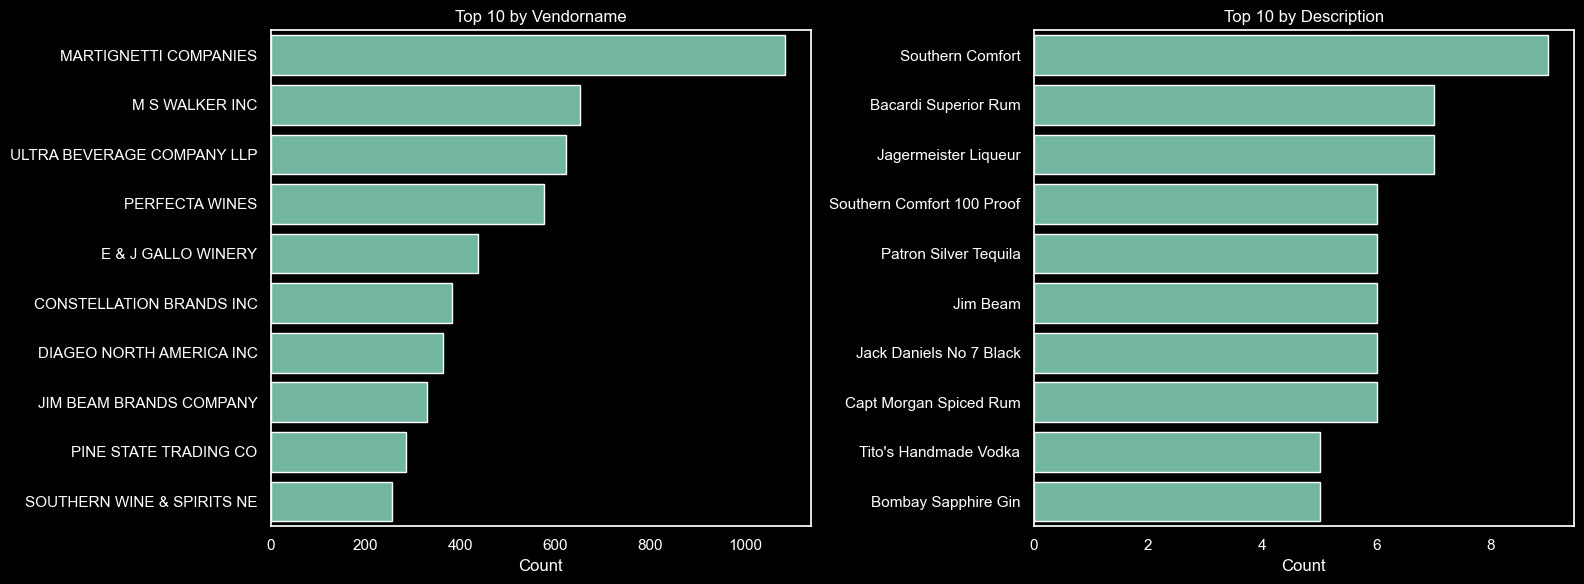

In [107]:
# 📊 Count Plots: Top 10 Vendors and Descriptions

plt.style.use('dark_background')  
sns.set_palette('Set2')

categorical_cols = ["vendorname", "description"]  

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row × 2 columns

for i, col in enumerate(categorical_cols):
    sns.countplot(
        y=df[col],
        order=df[col].value_counts().index[:10],
        ax=axes[i]
    )
    axes[i].set_title(f"Top 10 by {col.capitalize()}", fontsize=12)
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


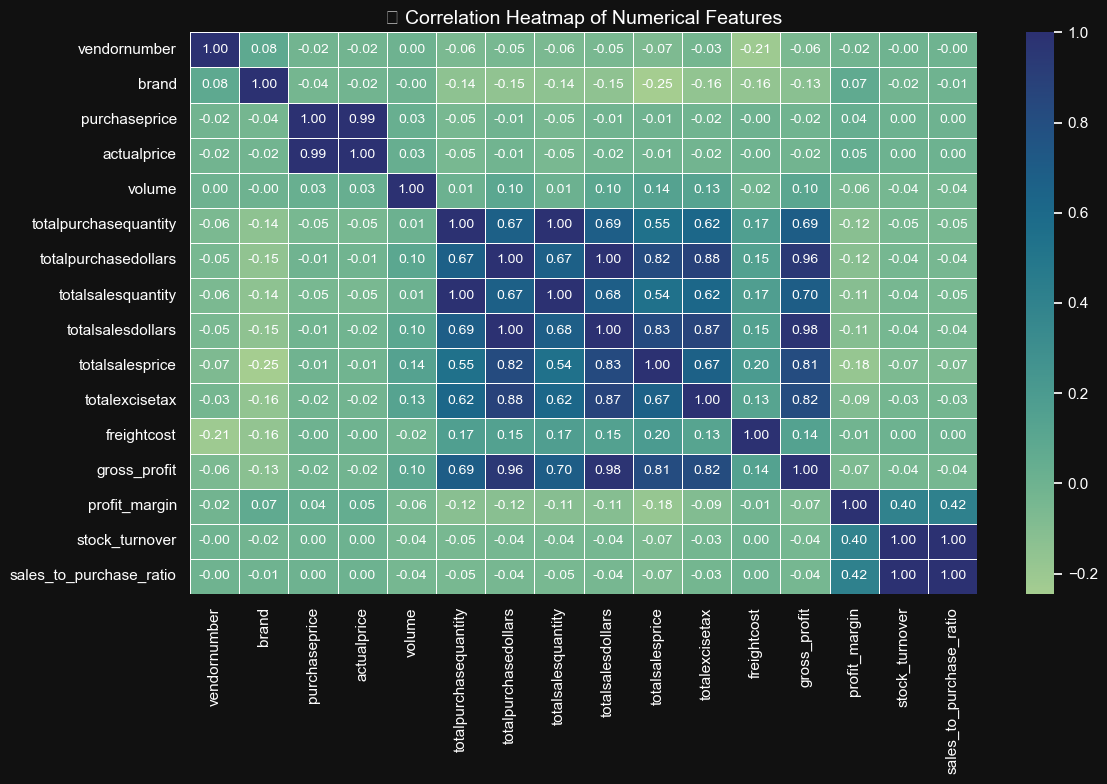

In [108]:
plt.style.use('dark_background')
sns.set_theme(style='darkgrid')

# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="crest",
    linewidths=0.5,
    annot_kws={"color": "white", "size": 10},
    ax=ax
)

# Set background colors
ax.set_facecolor('#111111')
fig.patch.set_facecolor('#111111')

# Set tick label colors (X and Y axes)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set colorbar (scale) label colors to white
colorbar = heatmap.collections[0].colorbar
colorbar.ax.yaxis.set_tick_params(color='white')
plt.setp(colorbar.ax.yaxis.get_ticklabels(), color='white')

# Set title
plt.title("📈 Correlation Heatmap of Numerical Features", fontsize=14, color='white')
plt.tight_layout()
plt.show()


### 📊 Correlation Insights
- purchaseprice shows very weak negative correlations with both totalsalesdollars (-0.012) and gross_profit (-0.016), indicating that changes in purchase cost have little impact on revenue or profit.

- totalpurchasequantity and totalsalesquantity have an extremely strong positive correlation (0.999), suggesting a tightly aligned purchasing and sales cycle — a sign of efficient inventory management.

- totalsalesprice shows a moderate negative correlation with profit_margin (-0.179), implying that higher sales prices may be associated with lower     margins — possibly due to discounting, promotions, or competitive pricing strategies.

- stock_turnover has a weak negative correlation with both gross_profit (-0.038) and profit_margin (-0.055), suggesting that faster inventory movement does not always translate to higher profitability.

# 💡 Business Insights & Recommendations

- #### Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [112]:
brand_performance = df.groupby('description').agg({
    'totalsalesdollars': 'sum',
     'profit_margin': 'mean'
}).reset_index()

brand_performance.sort_values('profit_margin')


,description,totalsalesdollars,profit_margin
5485,Pepperjack Barossa Red,191.92,0.020842
2954,Flint & Steel Svgn Bl Napa V,119.92,0.033356
2179,Croft Tawny Porto,191.84,0.041701
2561,Douglass Hill Merlot,143.76,0.083472
5385,Parducci 13 True Grit Chard,24927.81,0.121190
...,...,...,...
4568,M Chiarlo Gavi Wh,1208.90,99.393664
657,Beniotome Sesame Shochu,4768.41,99.534226
6449,Skinnygirl Tangerine Vodka,2368.42,99.544844
2411,DiSaronno Amaretto,4781.16,99.553246


In [113]:
#defining threseholds
low_sales_threshold = brand_performance['totalsalesdollars'].quantile(0.15) #gives lower sales brand (bottom 15%) 
high_margin_threshold = brand_performance['profit_margin'].quantile(0.85) #gives high profit margin brand (top 15%)

# Filter brands with low sales but high profit margins
target_brands = brand_performance[(brand_performance['totalsalesdollars'] <= low_sales_threshold) & (brand_performance['profit_margin']>=high_margin_threshold)]
print("Brands with Low Sales but High Profit Margins: ")
display(target_brands.sort_values('profit_margin'))

Brands with Low Sales but High Profit Margins: 


,description,totalsalesdollars,profit_margin
4764,McCormick Cherry Vodka,188.73,65.077094
7069,Three Olives Tomato Vodka,314.79,65.246672
2473,Dom Piquemal Cotes du Roussi,359.76,65.510340
7447,Viu Manent Cab Svgn La Capil,167.88,65.511079
4496,Louis Jadot Chmble-Musgny 11,99.98,65.513103
...,...,...,...
4592,Mad Dogs & Englishmen Jumil,279.80,97.666190
6,12 Days of Pearls Gift Set,309.69,97.678323
1873,Chi Chi's Chocolate Malt RTD,461.58,98.110837
452,Bacardi Oakheart Spiced Trav,399.60,98.133133


In [114]:
brand_performance = brand_performance[brand_performance['totalsalesdollars']<10000] # for better visualization

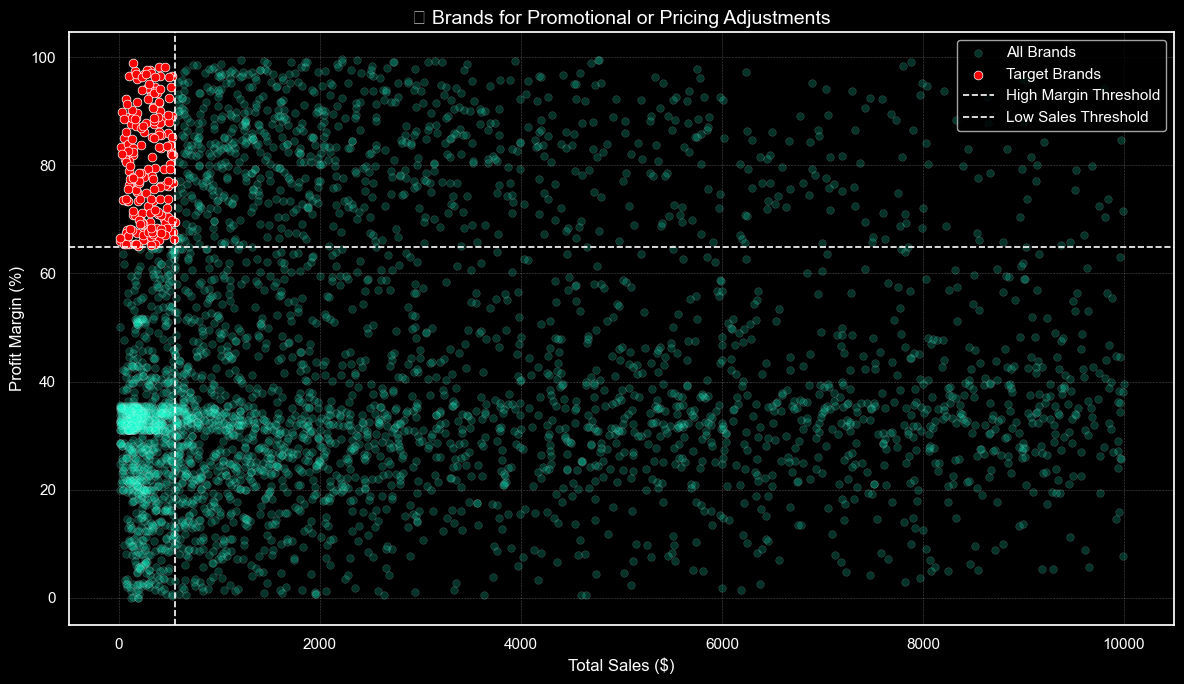

In [115]:
plt.style.use('dark_background')

# Plot
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=brand_performance,
    x='totalsalesdollars',
    y='profit_margin',
    color='#00FFCC',   
    alpha=0.2,
    s=30,
    label="All Brands"
)

# Target Brands (red solid dots)
sns.scatterplot(
    data=target_brands,
    x='totalsalesdollars',
    y='profit_margin',
    color='red',
    edgecolor='white',
    s=40,
    label="Target Brands"
)

# Threshold Lines
plt.axhline(high_margin_threshold, linestyle='--', color='white', linewidth=1.2, label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='white', linewidth=1.2, label='Low Sales Threshold')

# Labels and Aesthetics
plt.xlabel("Total Sales ($)", fontsize=12)
plt.ylabel("Profit Margin (%)", fontsize=12)
plt.title("🔍 Brands for Promotional or Pricing Adjustments", fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', linewidth=0.4, alpha=0.3)
plt.tight_layout()
plt.show()


---
- #### Which vendors and brands demonstrate the highest sales performance?
---

In [117]:
#top vendors and brands by sales performance
top_vendors = df.groupby('vendorname')['totalsalesdollars'].sum().nlargest(10)
top_brands = df.groupby('description')['totalsalesdollars'].sum().nlargest(10)


In [118]:
# Format Values for Display (K/M) ---
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

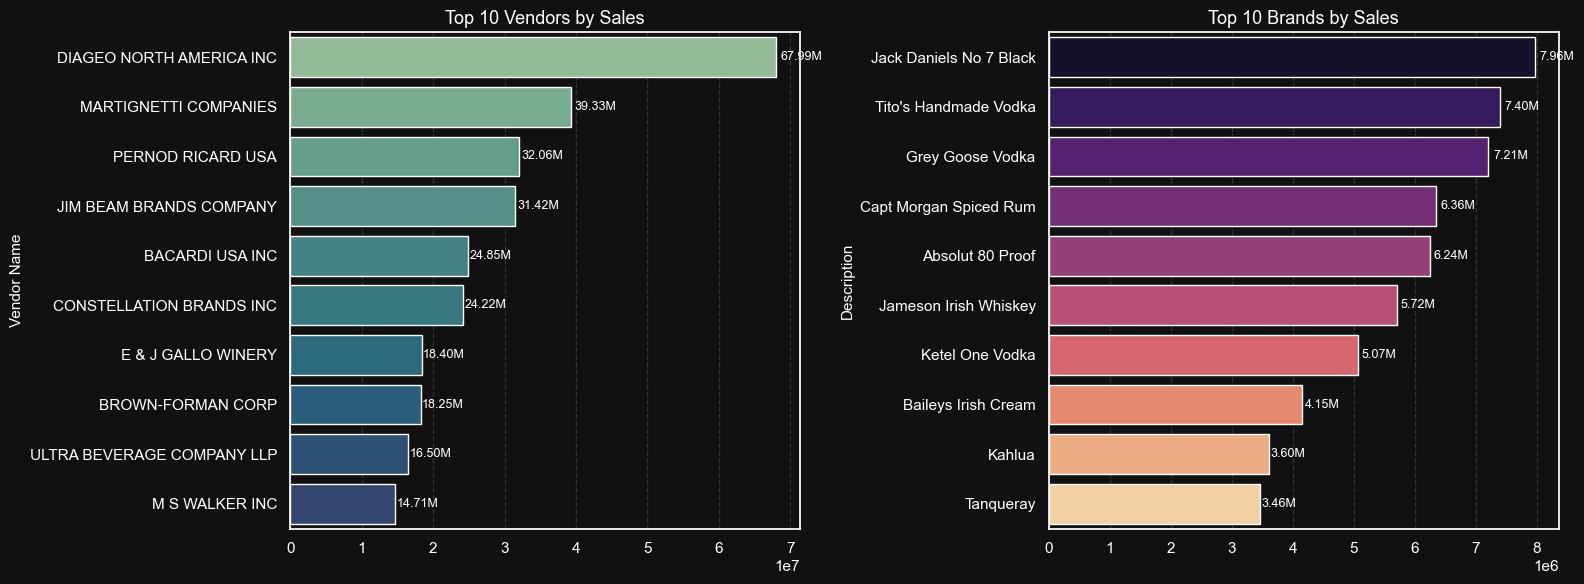

In [119]:
plt.style.use("dark_background")
sns.set_theme(
    style="darkgrid",
    rc={
        "axes.facecolor": "#111111",
        "figure.facecolor": "#111111",
        "grid.color": "gray",
        "grid.linestyle": "--",
        "grid.alpha": 0.3,
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
    }
)

# Layout with adjusted spacing
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # wider
fig.subplots_adjust(wspace=0.4)  # increased space between plots

# --- Left Plot: Top Vendors ---
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="crest", ax=axes[0])
ax1.set_title("Top 10 Vendors by Sales", fontsize=13, color="white")
ax1.set_xlabel("")
ax1.set_ylabel("Vendor Name", fontsize=11, color="white")
ax1.tick_params(axis='both', colors='white')

# Annotate
for bar in ax1.patches:
    width = bar.get_width()
    ax1.text(width + width * 0.01,
             bar.get_y() + bar.get_height() / 2,
             format_dollars(width),
             ha='left', va='center', fontsize=9, color='white')

# --- Right Plot: Top Brands ---
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="magma", ax=axes[1])
ax2.set_title("Top 10 Brands by Sales", fontsize=13, color="white")
ax2.set_xlabel("")
ax2.set_ylabel("Description", fontsize=11, color="white")
ax2.tick_params(axis='both', colors='white')

# Annotate
for bar in ax2.patches:
    width = bar.get_width()
    ax2.text(width + width * 0.01,
             bar.get_y() + bar.get_height() / 2,
             format_dollars(width),
             ha='left', va='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()


- ### Which vendors contribute the most to total purchase dollars?

In [121]:
# --- Step 1: Group by Vendor and Aggregate Key Metrics ---
vendor_performance = df.groupby("vendorname").agg({
    "totalpurchasedollars": "sum",
    "gross_profit": "sum",
    "totalsalesdollars": "sum"
}).reset_index()

# --- Step 2: Calculate % Contribution to Total Purchase Spend ---
vendor_performance["purchase_contribution_pct"] = (
    vendor_performance["totalpurchasedollars"] /
    vendor_performance["totalpurchasedollars"].sum()
) * 100

# --- Step 3: Sort by Total Purchase Spend (Descending) ---
vendor_performance = vendor_performance.sort_values(
    by="totalpurchasedollars", ascending=False
).round(2)

# --- Step 4: Select Top 10 Vendors ---
top_vendors = vendor_performance.head(10).copy()
top_vendors["totalsalesdollars"] = top_vendors["totalsalesdollars"].apply(format_dollars)
top_vendors["totalpurchasedollars"] = top_vendors["totalpurchasedollars"].apply(format_dollars)
top_vendors["gross_profit"] = top_vendors["gross_profit"].apply(format_dollars)
top_vendors["purchase_contribution_pct"] = top_vendors["purchase_contribution_pct"].round(2)

# --- Step 5: Display the Final Table ---
top_vendors


,vendorname,totalpurchasedollars,gross_profit,totalsalesdollars,purchase_contribution_pct
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


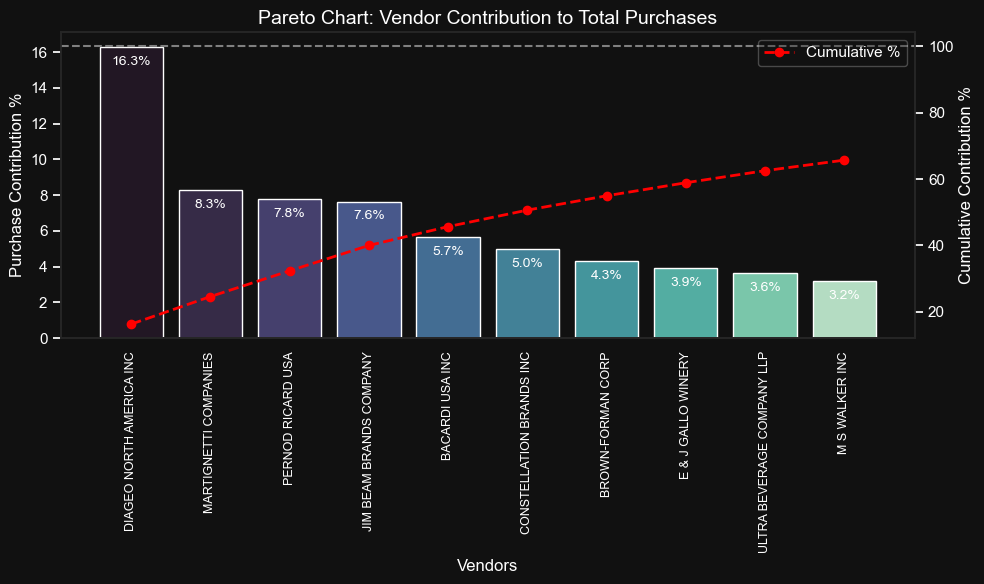

In [122]:
top_vendors['cumulative_contribution_pct'] = top_vendors['purchase_contribution_pct'].cumsum()

plt.style.use("dark_background")
sns.set_theme(
    style="white",  
    rc={
        "axes.facecolor": "#111111",
        "figure.facecolor": "#111111",
        "grid.alpha": 0.0,  
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
    }
)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(
    x=top_vendors['vendorname'],
    y=top_vendors['purchase_contribution_pct'],
    palette="mako",
    ax=ax1,
    edgecolor="white"
)

# Annotate bars
for i, value in enumerate(top_vendors['purchase_contribution_pct']):
    ax1.text(
        i,
        value - 1,
        f"{value:.1f}%",
        ha='center',
        fontsize=10,
        color='white'
    )

# Line plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['vendorname'],
    top_vendors['cumulative_contribution_pct'],  
    color='red',
    marker='o',
    linestyle='dashed',
    linewidth=2,
    label='Cumulative %'
)

# 100% reference line only
ax2.axhline(100, color='gray', linestyle='--', linewidth=1.5)

# Remove default grid
ax1.grid(False)
ax2.grid(False)

# Styling axes
ax1.set_xticklabels(top_vendors['vendorname'], rotation=90, fontsize=9)
ax1.set_xlabel("Vendors", color='white')
ax1.set_ylabel("Purchase Contribution %", color='white')
ax2.set_ylabel("Cumulative Contribution %", color='white')

# Title and legend
ax1.set_title("Pareto Chart: Vendor Contribution to Total Purchases", color='white', fontsize=14)
ax2.legend(loc='upper right', facecolor='#111111', framealpha=0.3, labelcolor='white')

plt.tight_layout()
plt.show()

- #### How much of total procurement is dependent on the top vendors?

In [124]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['purchase_contribution_pct'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 65.69 %


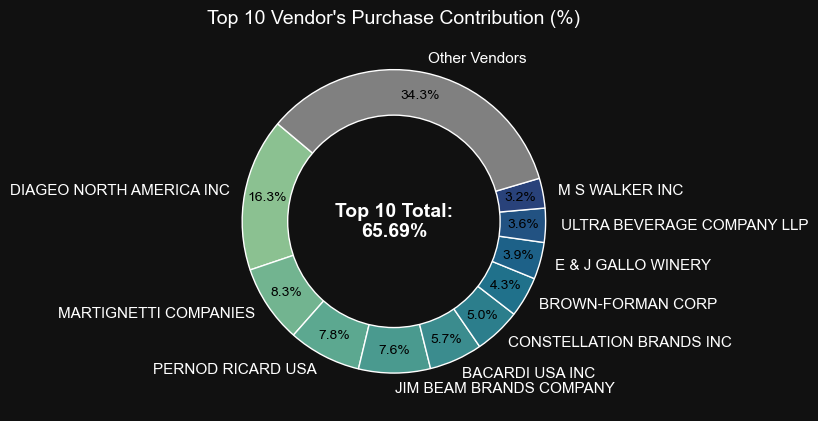

In [125]:
# Theme setup
plt.style.use("dark_background")
sns.set_theme(
    style="white",
    rc={
        "axes.facecolor": "#111111",
        "figure.facecolor": "#111111",
        "grid.alpha": 0.0,
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
    }
)

# Prepare data
vendors = list(top_vendors['vendorname'].values)
purchase_contributions = list(top_vendors['purchase_contribution_pct'].values)
total_contribution = round(sum(purchase_contributions), 2)
remaining_contribution = round(100 - total_contribution, 2)

vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Colors: crest theme + gray for "Other Vendors"
colors = sns.color_palette("crest", n_colors=10) + [(0.5, 0.5, 0.5)]

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=colors
)

#  Make only the inner percentage labels black
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

# Add dark center circle
centre_circle = plt.Circle((0, 0), 0.70, fc='#111111')
fig.gca().add_artist(centre_circle)

# Add white center text
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center',
    color='white'
)

plt.title("Top 10 Vendor's Purchase Contribution (%)", fontsize=14, color='white')
plt.tight_layout()
plt.show()


#### 🧠 Insights: Vendor Dependency
- The top 10 vendors contribute a substantial 65.69% of total purchase dollars.

- The remaining vendors account for only 34.31%, suggesting they may be underutilized or less competitive in terms of pricing, reliability, or product mix.

#### ✅ Recommendations:
- Strengthen relationships with top-performing vendors through strategic partnerships or bulk deals to maintain procurement efficiency.

- However, a 65%+ dependency on a few vendors poses a supply chain risk.

- Evaluate and activate underutilized vendors or consider onboarding new suppliers to improve competitiveness and reduce over-reliance.



---
- ####  Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [128]:
# ✅ Step 1: Calculate Unit Purchase Price
df["unit_purchase_price"] = df["totalpurchasedollars"] / df["totalpurchasequantity"]

# ✅ Step 2: Categorize into Purchase Volume Buckets
df["purchase_volume_group"] = pd.qcut(
    df["totalpurchasequantity"],
    q=3,
    labels=["Low Volume", "Medium Volume", "High Volume"]
)

# ✅ Step 3: Analyze Avg Unit Price per Volume Group
bulk_purchase_summary = (
    df.groupby("purchase_volume_group")["unit_purchase_price"]
    .mean()
    .reset_index()
    .round(2)
)

# ✅ Output Summary Table
print("💡 Average Unit Purchase Price by Purchase Volume Group:")
display(bulk_purchase_summary)


💡 Average Unit Purchase Price by Purchase Volume Group:


,purchase_volume_group,unit_purchase_price
0,Low Volume,39.07
1,Medium Volume,15.49
2,High Volume,10.78


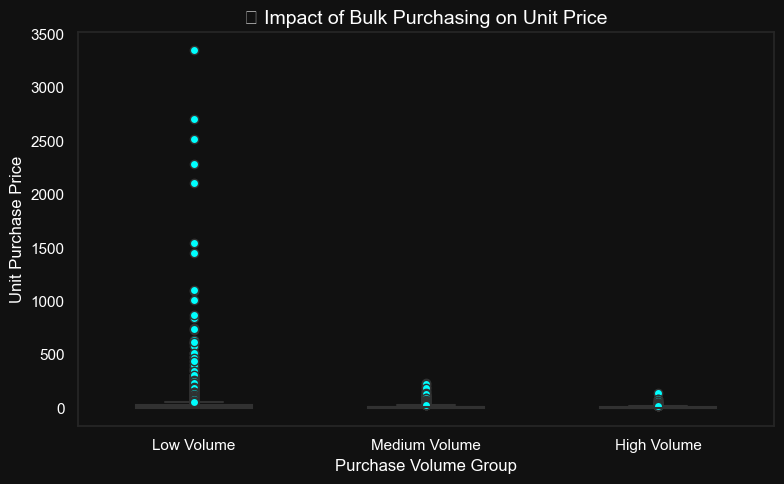

In [129]:
plt.style.use("dark_background")
sns.set_theme(
    style="white",
    rc={
        "axes.facecolor": "#111111",
        "figure.facecolor": "#111111",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white"
    }
)

# Create the boxplot with custom flier (outlier) properties
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="purchase_volume_group",   # or 'OrderSize'
    y="unit_purchase_price",
    palette="crest",
    width=0.5,
    linewidth=1.5,
    flierprops=dict(marker='o', markerfacecolor='#00FFFF', markersize=6, linestyle='none')  # bright cyan bubbles
)

# Labels and title
plt.title("📦 Impact of Bulk Purchasing on Unit Price", fontsize=14)
plt.xlabel("Purchase Volume Group")
plt.ylabel("Unit Purchase Price")
plt.tight_layout()
plt.show()


---
- Vendors making large purchases (Large Order Size) pay the lowest unit price (around $10.78 per unit), indicating potential for higher profit margins if inventory is managed well.

- There's a significant unit cost difference between Small and Large orders — nearly 72% reduction, highlighting the impact of bulk deals.

- This confirms that bulk pricing strategies are effective in encouraging larger orders, which boosts total sales volume even if per-unit revenue decreases.

---

- #### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [132]:
low_turnover_vendors = df[df["stock_turnover"] < 1] \
                        .groupby("vendorname")["stock_turnover"].mean() \
                        .reset_index() \
                        .sort_values(by="stock_turnover", ascending=True)

low_turnover_vendors.head(10)


,vendorname,stock_turnover
0,ALISA CARR BEVERAGES,0.615385
36,HIGHLAND WINE MERCHANTS LLC,0.708333
60,PARK STREET IMPORTS LLC,0.751306
19,Circa Wines,0.755676
26,Dunn Wine Brokers,0.766022
15,CENTEUR IMPORTS LLC,0.773953
78,SMOKY QUARTZ DISTILLERY LLC,0.783835
90,TAMWORTH DISTILLING,0.797078
91,THE IMPORTED GRAPE LLC,0.807569
101,WALPOLE MTN VIEW WINERY,0.820548


 - Slow-moving inventory increases holding costs (warehouse rent, insurance, depreciation)
- Identifying vendors with low inventory turnover is critical for business efficiency, cost reduction, and profitability


--- 
- #### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [135]:
# Calculate Unsold Inventory Value
df["unsold_inventory_value"] = (df["totalpurchasequantity"] - df["totalsalesquantity"]) * df["purchaseprice"]
print('Total Unsold Capital:', format_dollars(df["unsold_inventory_value"].sum()))

# Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("vendorname")["unsold_inventory_value"].sum().reset_index()

# Sort Vendors by Highest Capital Blocked
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="unsold_inventory_value", ascending=False)

# Format Values for Display
inventory_value_per_vendor['unsold_inventory_value'] = inventory_value_per_vendor['unsold_inventory_value'].apply(format_dollars)

inventory_value_per_vendor.head(10)


Total Unsold Capital: 2.71M


,vendorname,unsold_inventory_value
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


- #### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

 Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
 Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


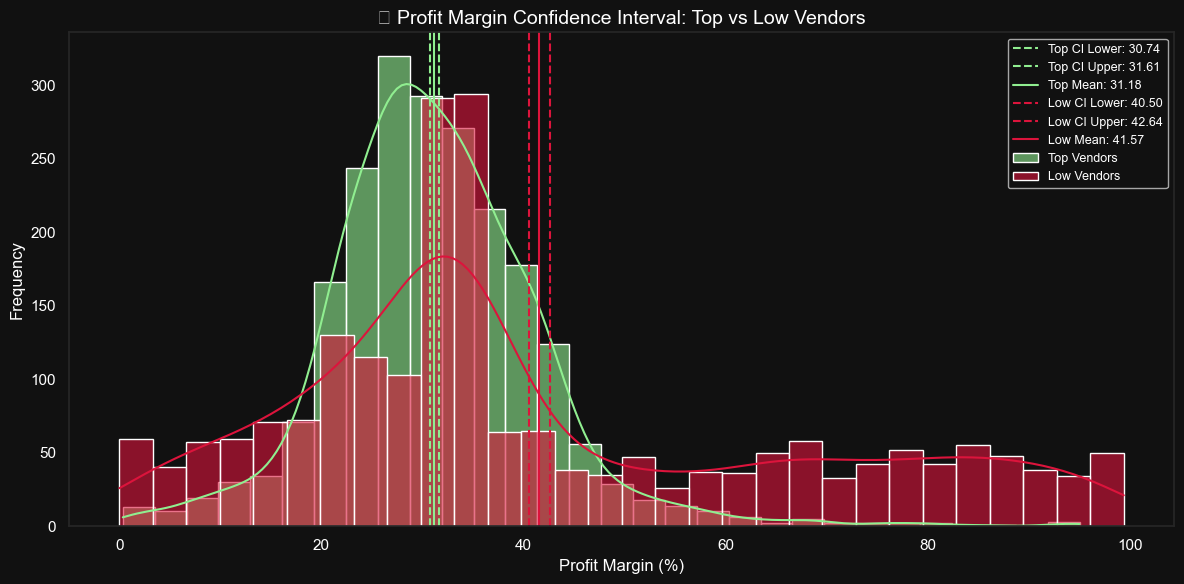

In [137]:
plt.style.use("dark_background")
sns.set_theme(
    style="white",  
    rc={
        "axes.facecolor": "#111111",
        "figure.facecolor": "#111111",
        "grid.alpha": 0.0,
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
    }
)

# Define thresholds (Top 25% & Bottom 25%)
top_threshold = df["totalsalesdollars"].quantile(0.75)
low_threshold = df["totalsalesdollars"].quantile(0.25)

# Filter profit margins
top_vendors = df[df["totalsalesdollars"] >= top_threshold]["profit_margin"].dropna()
low_vendors = df[df["totalsalesdollars"] <= low_threshold]["profit_margin"].dropna()

# CI function
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin = t_critical * std_err
    return mean_val, mean_val - margin, mean_val + margin

# Compute intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f" Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f" Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plotting
plt.figure(figsize=(12, 6))

# Top Vendors - Light Green
sns.histplot(top_vendors, kde=True, color="#90ee90", bins=30, alpha=0.6, label="Top Vendors")
plt.axvline(top_lower, color="#90ee90", linestyle="--", label=f"Top CI Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="#90ee90", linestyle="--", label=f"Top CI Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="#90ee90", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors - Red
sns.histplot(low_vendors, kde=True, color="crimson", bins=30, alpha=0.6, label="Low Vendors")
plt.axvline(low_lower, color="crimson", linestyle="--", label=f"Low CI Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="crimson", linestyle="--", label=f"Low CI Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="crimson", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Final plot settings
plt.title("🔍 Profit Margin Confidence Interval: Top vs Low Vendors", fontsize=14)
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend(loc="upper right", fontsize=9)
plt.tight_layout()
plt.show()


- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

---
- #### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [140]:
# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(top_vendors, low_vendors, equal_var=False)

# Display Results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret Result
if p_value < 0.05:
    print("🔍 Result: Reject the null hypothesis. There is a significant difference in profit margins.")
else:
    print("✅ Result: Fail to reject the null hypothesis. No significant difference found.")


T-statistic: -17.67
P-value: 0.0000
🔍 Result: Reject the null hypothesis. There is a significant difference in profit margins.


- A p-value this small suggests that the difference is not just statistically significant but also practically meaningful.

- The two vendor groups operate very differently in terms of profitability.


---

### 💡 Implication

High-margin vendors could benefit from **refined pricing strategies**, while top-selling vendors should focus on **improving cost efficiency**.

### ✅ Final Recommendations

* **Reassess pricing** for low-sales, high-margin brands to increase sales volume without compromising profitability.
* **Diversify vendor relationships** to reduce reliance on a few suppliers and minimize supply chain risks.
* **Capitalize on bulk purchasing** to sustain competitive pricing while optimizing inventory management.
* **Address slow-moving inventory** by adjusting order quantities, running clearance promotions, or revising storage practices.
* **Boost marketing and distribution efforts** for low-performing vendors to drive sales growth while maintaining profit margins.

> By applying these strategies, the company can ensure **sustainable profitability**, minimize operational risks, and enhance overall efficiency.

---



In [142]:
#Saving the cleaned DataFrame:
df.to_csv('cleaned_vendor_data.csv', index=False)



<Figure size 640x480 with 0 Axes>